In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression


### Ejercicio 1:
Explique las diferencias entre técnicas de pronóstico cualitativas y cuantitativas.

**Respuesta:**
Las técnicas cualitativas se basan en juicios expertos y opiniones subjetivas (ej. Método Delphi, investigación de mercado), mientras que las cuantitativas utilizan modelos matemáticos con datos históricos (ej. series de tiempo, regresión). Las cualitativas son ideales cuando hay poca data histórica o cambios disruptivos, y las cuantitativas cuando existen patrones detectables en datos numéricos.

---

### Ejercicio 2:
Describa cada uno de los componentes en una serie temporal.

**Respuesta:**
1. **Tendencia (T):** Movimiento secular a largo plazo (crecimiento/declinación sostenido).  
2. **Estacionalidad (S):** Patrones que se repiten en períodos fijos (ej. ventas navideñas anuales).  
3. **Ciclicidad (C):** Fluctuaciones no periódicas (>1 año, relacionadas con ciclos económicos).  
4. **Irregular (I):** Variación aleatoria no sistemática (ruido estadístico).  

---

### Ejercicio 3:
¿Qué mide un coeficiente de autocorrelación?

**Respuesta:**
Mide la correlación lineal entre una observación en el tiempo *t* y otra en *t-k* (donde *k* es el *lag*). Un valor significativo indica dependencia temporal, revelando patrones como estacionalidad o tendencia. Por ejemplo, una autocorrelación alta en *lag=12* para datos mensuales sugiere estacionalidad anual.

---

### Ejercicio 4:
Para cada afirmación, indique si describe una serie estacionaria o no estacionaria:  
a) Una serie con tendencia  
b) Una serie con media y varianza constantes  
c) Una serie cuya media cambia en el tiempo  
d) Una serie sin crecimiento ni declive  

**Respuesta:**  
a) ❌ No estacionaria (la tendencia afecta la media)  
b) ✅ Estacionaria  
c) ❌ No estacionaria  
d) ✅ Estacionaria  

---

### Ejercicio 5:
Enumere técnicas de pronóstico para series estacionarias y ejemplos de aplicación.

**Respuesta:**  
- **Media móvil:** Suavizado de demanda estable (ej. inventarios de productos básicos).  
- **Suavizado exponencial:** Pronóstico de ventas con variación aleatoria mínima (ej. consumo eléctrico residencial).  
- **ARIMA(0,d,0):** Cuando la serie es ruido blanco (ej. fluctuaciones aleatorias en temperatura ambiente).  

---

### Ejercicio 6:
Enumere técnicas de pronóstico para series estacionales y ejemplos de aplicación.

**Respuesta:**  
- **Descomposición clásica:** Venta de juguetes (pico en diciembre).  
- **SARIMA:** Consumo de energía eléctrica (patrones mensuales/anuales).  
- **Regresión con dummies estacionales:** Turismo en zonas con temporadas fijas (ej. verano/invierno).  

### Ejercicio 7:
Los datos muestran el número de matrimonios en Europa (en miles) de 1994 a 2007:

| Año | Matrimonios | Año | Matrimonios |
|-----|------------|-----|------------|
| 1994 | 2413 | 2001 | 2362 |
| 1995 | 2407 | 2002 | 2334 |
| 1996 | 2403 | 2003 | 2362 |
| 1997 | 2396 | 2004 | 2336 |
| 1998 | 2403 | 2005 | 2344 |
| 1999 | 2443 | 2006 | 2384 |
| 2000 | 2371 | 2007 | 2244 |

a. Calcule las primeras diferencias  
b. Grafique la serie original y las diferencias  
c. ¿Existe tendencia en alguna de estas series? Discuta los resultados

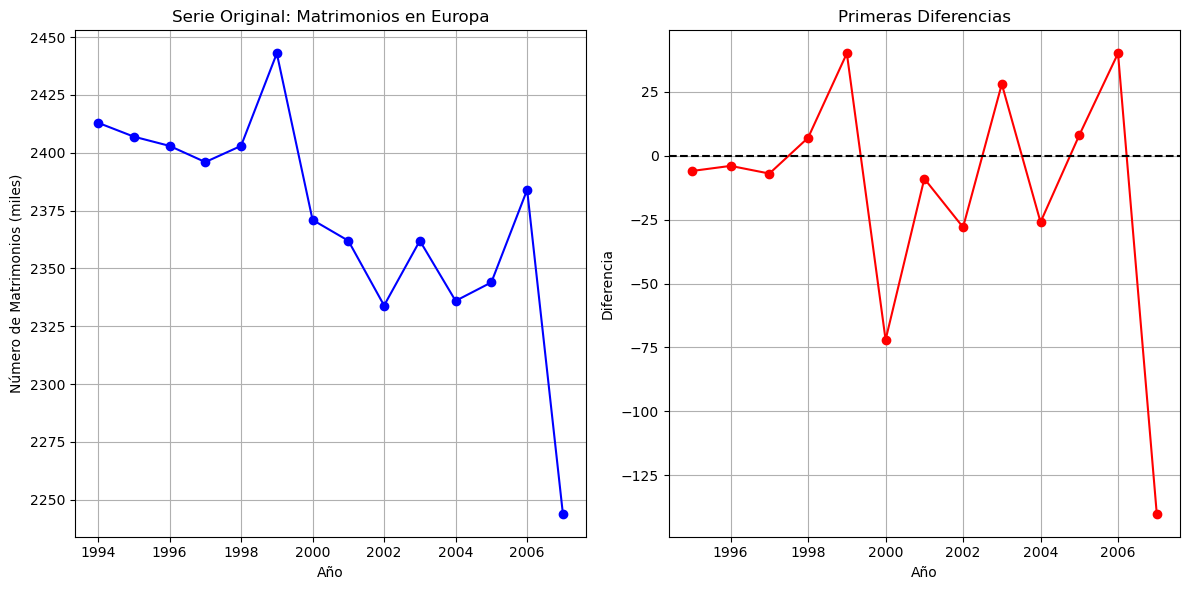


c. Análisis de tendencia:
- Serie Original: La ligera disminución general sugiere una posible tendencia decreciente
- Diferencias: Las fluctuaciones alrededor del cero indican que las diferencias son estacionarias
Conclusión: La serie original muestra tendencia, mientras que sus diferencias no


In [4]:
# Datos
data = {
    'Año': [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007],
    'Matrimonios': [2413, 2407, 2403, 2396, 2403, 2443, 2371, 2362, 2334, 2362, 2336, 2344, 2384, 2244]
}
df = pd.DataFrame(data)

# a. Primeras diferencias
df['Diferencias'] = df['Matrimonios'].diff()

# b. Gráficos
plt.figure(figsize=(12, 6))

# Serie original
plt.subplot(1, 2, 1)
plt.plot(df['Año'], df['Matrimonios'], marker='o', color='blue')
plt.title('Serie Original: Matrimonios en Europa')
plt.xlabel('Año')
plt.ylabel('Número de Matrimonios (miles)')
plt.grid(True)

# Serie de diferencias
plt.subplot(1, 2, 2)
plt.plot(df['Año'][1:], df['Diferencias'][1:], marker='o', color='red')  # Excluimos el primer NaN
plt.title('Primeras Diferencias')
plt.xlabel('Año')
plt.ylabel('Diferencia')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

# c. Análisis de tendencia
print("\nc. Análisis de tendencia:")
print("- Serie Original: La ligera disminución general sugiere una posible tendencia decreciente")
print("- Diferencias: Las fluctuaciones alrededor del cero indican que las diferencias son estacionarias")
print("Conclusión: La serie original muestra tendencia, mientras que sus diferencias no")

### Ejercicio 8:
Para cada situación, indique qué medida de precisión de pronóstico sería la más adecuada:

a. El analista considera importante la magnitud de la variable pronosticada al evaluar la precisión  
b. El analista necesita penalizar los grandes errores de pronóstico  

**Respuestas:**  

a. **Error Porcentual Absoluto Medio (MAPE)**  
   - Razón: Estandariza los errores como porcentaje de los valores reales, permitiendo comparaciones relativas independientemente de la escala.  
   - Fórmula:  
     ```
     MAPE = (1/n) * Σ(|(Actual - Pronóstico)/Actual|) * 100
     ```  
   - Ejemplo: Si se pronostican ventas entre $1M y $100M, el MAPE permite comparar errores de manera equitativa.  

b. **Error Cuadrático Medio (MSE) o Raíz del Error Cuadrático Medio (RMSE)**  
   - Razón: Al elevar al cuadrado los errores, penaliza más los errores grandes que los pequeños.  
   - Fórmulas:  
     ```
     MSE = (1/n) * Σ(Actual - Pronóstico)²  
     RMSE = √MSE
     ```  
   - Ejemplo: En gestión de inventarios, un error de 100 unidades es más que el doble de grave que uno de 50 unidades (100² = 10,000 vs 50² = 2,500).  

**Comparación Visual:**  

| Medida | Ventaja | Desventaja | Caso de Uso |  
|--------|---------|------------|-------------|  
| MAPE   | Escala independiente | Indefinido si hay valores cero | Cuando la magnitud relativa importa |  
| MSE/RMSE | Penaliza errores grandes | Sensible a outliers | Cuando los errores grandes son críticos |  

**Ejemplo Numérico:**  
Para pronósticos: [10, 20] vs reales: [12, 18]:  
- MAPE = (|2/12| + |2/18|)/2 * 100 ≈ 15.7%  
- MSE = (2² + 2²)/2 = 4  
- RMSE = √4 = 2  

### Ejercicio 9:
Alice Vila, oficial de créditos del Banco Europeo, analiza la cartera de préstamos (en millones €) trimestrales de 2002 a 2007:

| Año   | Mar.31 | Jun.30 | Sep.30 | Dic.31 |
|-------|--------|--------|--------|--------|
| 2002  | 2313   | 2495   | 2609   | 2792   |
| 2003  | 2860   | 3099   | 3202   | 3161   |
| 2004  | 3399   | 3471   | 3545   | 3851   |
| 2005  | 4458   | 4850   | 5093   | 5318   |
| 2006  | 5756   | 6013   | 6158   | 6289   |
| 2007  | 6369   | 6568   | 6646   | 6861   |

**a.** Calcule las autocorrelaciones para lags 1 y 2. Pruebe si son significativamente diferentes de cero (α=0.05)  
**b.** Grafique la serie y calcule autocorrelaciones para los primeros 6 lags. ¿Es esta serie estacionaria?

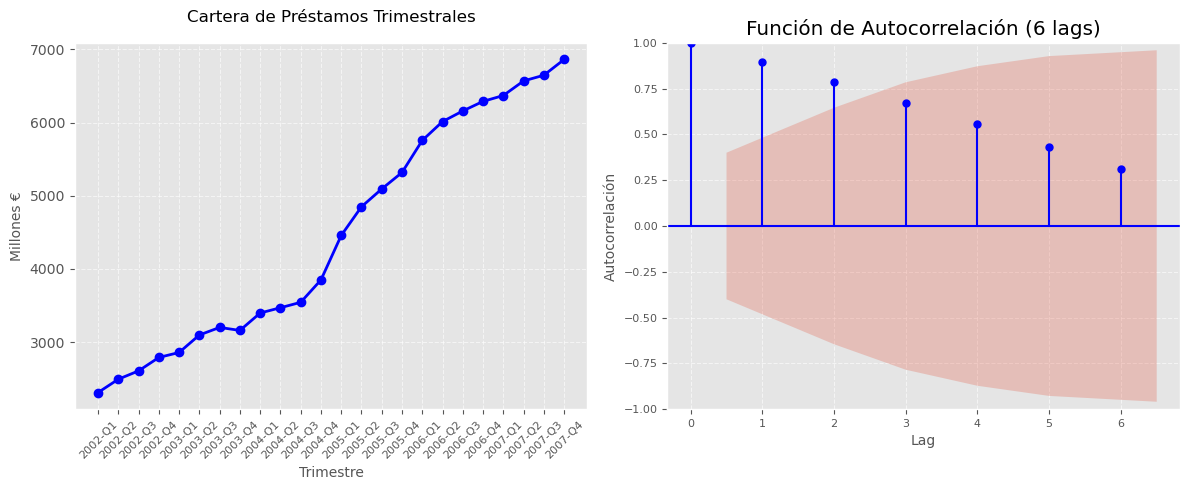


=== Resumen Estadístico ===
count      24.000000
mean     4465.666667
std      1559.164929
min      2313.000000
25%      3145.500000
50%      4154.500000
75%      6049.250000
max      6861.000000
dtype: float64

=== Autocorrelaciones ===
Lag 1: 0.895
Lag 2: 0.788
Lag 3: 0.673
Lag 4: 0.558
Lag 5: 0.433
Lag 6: 0.309


In [7]:
# 1. Preparar datos
data = [
    2313, 2495, 2609, 2792, 2860, 3099, 3202, 3161, 3399, 3471, 3545, 3851,
    4458, 4850, 5093, 5318, 5756, 6013, 6158, 6289, 6369, 6568, 6646, 6861
]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = list(range(2002, 2008))
index = [f"{y}-{q}" for y in years for q in quarters][:len(data)]
ts = pd.Series(data, index=index)

# 2. Configurar gráficos con estilo disponible
plt.style.use('ggplot')  # Usamos 'ggplot' que es un estilo común alternativo
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['axes.grid'] = True  # Habilitar grid manualmente

# 3. Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Gráfico de la serie temporal
ax1.plot(ts.index, ts.values, marker='o', color='blue', linewidth=2)
ax1.set_title('Cartera de Préstamos Trimestrales', pad=15, fontsize=12)
ax1.set_ylabel('Millones €', fontsize=10)
ax1.set_xlabel('Trimestre', fontsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=8)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de autocorrelación
plot_acf(ts, lags=6, alpha=0.05, ax=ax2, color='blue', 
         title='Función de Autocorrelación (6 lags)', 
         vlines_kwargs={'colors': 'blue'})
ax2.set_xlabel('Lag', fontsize=10)
ax2.set_ylabel('Autocorrelación', fontsize=10)
ax2.tick_params(labelsize=8)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 4. Resultados numéricos
print("\n=== Resumen Estadístico ===")
print(ts.describe())

print("\n=== Autocorrelaciones ===")
acf_values = acf(ts, nlags=6)
for lag, value in enumerate(acf_values[1:7], 1):  # Lags 1-6
    print(f"Lag {lag}: {value:.3f}")

### Ejercicio 10:
El archivo **TSAI_1.xls** contiene las ventas semanales (en unidades) de un producto alimenticio durante 52 semanas consecutivas:

**a.** Represente gráficamente la serie temporal de ventas 

**b.** Analice si la serie es estacionaria mediante:  
   - Inspección visual del gráfico  
   - Prueba de Dickey-Fuller aumentada (ADF) con α=0.05

**c.** Calcule la función de autocorrelación (ACF) para los primeros 10 lags y discuta si:  
   - Los resultados confirman su diagnóstico de estacionariedad  
   - Existe estacionalidad en los datos  

Datos cargados correctamente. Primeras 5 semanas:
2023-01-01    2649.9
2023-01-08    2898.7
2023-01-15    2897.8
2023-01-22    3054.3
2023-01-29    3888.1
Freq: W-SUN, dtype: float64


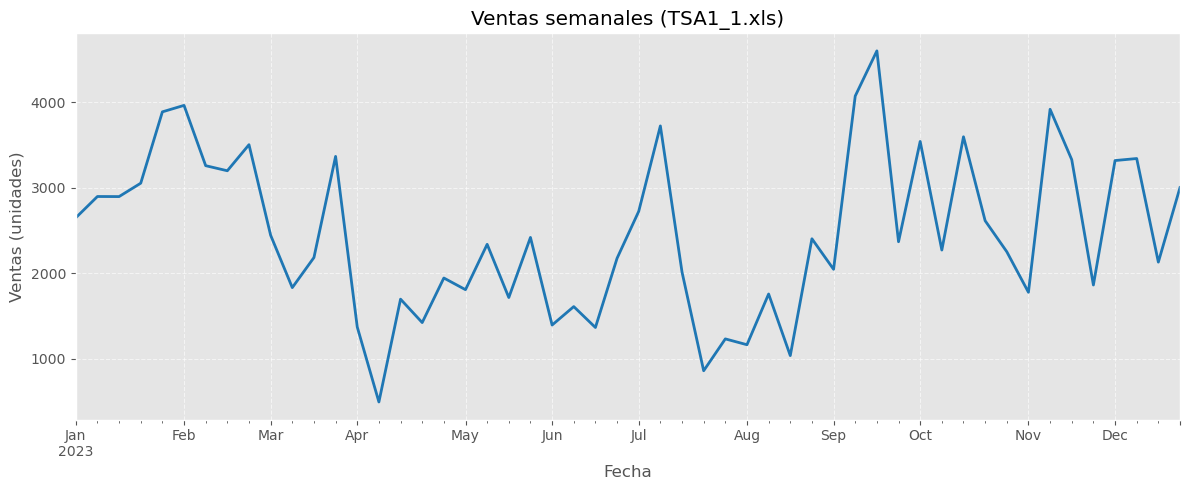


--- Test de Dickey-Fuller Aumentado ---
Estadístico ADF: -4.263
p-valor: 0.0005
Valores críticos:
   1%: -3.566
   5%: -2.920
   10%: -2.598

Conclusión: La serie ES estacionaria (α=0.05)


<Figure size 1000x400 with 0 Axes>

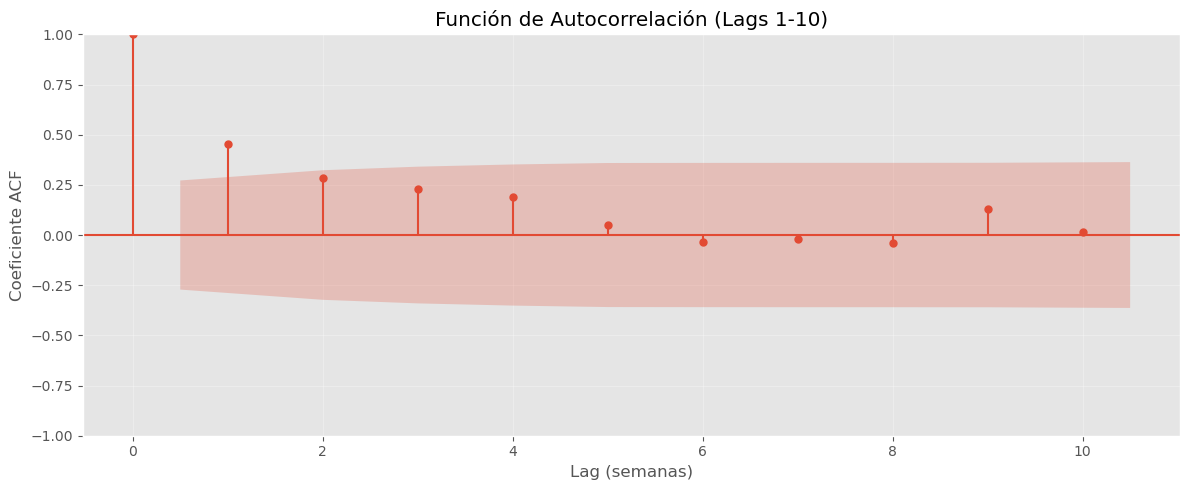


Coeficientes de autocorrelación:
Lag 1: 0.453
Lag 2: 0.283
Lag 3: 0.227
Lag 4: 0.187
Lag 5: 0.049
Lag 6: -0.033
Lag 7: -0.018
Lag 8: -0.038
Lag 9: 0.129
Lag 10: 0.014

Patrón detectado: Existe correlación serial significativa


In [9]:
# 1. Cargar datos desde el Excel
df = pd.read_excel('TSA1_1.xls')  # Asegúrate de tener el archivo en el mismo directorio
ventas = df['Sales'].dropna()  # Usamos la columna 'Sales' del Excel

# 2. Crear serie temporal con frecuencia semanal
serie = pd.Series(ventas.values, index=pd.date_range(start='2023-01-01', periods=len(ventas), freq='W'))
print("Datos cargados correctamente. Primeras 5 semanas:")
print(serie.head())

# 3. Gráfico de la serie (Parte a)
plt.figure(figsize=(12, 5))
serie.plot(title='Ventas semanales (TSA1_1.xls)', color='#1f77b4', linewidth=2)
plt.ylabel('Ventas (unidades)')
plt.xlabel('Fecha')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Análisis de estacionariedad (Parte b)
def analizar_estacionariedad(serie):
    print("\n--- Test de Dickey-Fuller Aumentado ---")
    resultado = adfuller(serie)
    print(f'Estadístico ADF: {resultado[0]:.3f}')
    print(f'p-valor: {resultado[1]:.4f}')
    print('Valores críticos:')
    for key, value in resultado[4].items():
        print(f'   {key}: {value:.3f}')
    
    # Conclusión
    estacionaria = resultado[1] < 0.05
    print(f"\nConclusión: La serie {'ES estacionaria' if estacionaria else 'NO es estacionaria'} (α=0.05)")
    return estacionaria

estacionaria = analizar_estacionariedad(serie)

# 5. Autocorrelación (Parte c)
plt.figure(figsize=(10, 4))
plot_acf(serie, lags=10, alpha=0.05, title='Función de Autocorrelación (Lags 1-10)')
plt.xlabel('Lag (semanas)')
plt.ylabel('Coeficiente ACF')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Valores numéricos de ACF
print("\nCoeficientes de autocorrelación:")
acf_valores = acf(serie, nlags=10)
for lag, valor in enumerate(acf_valores[1:], 1):
    print(f"Lag {lag}: {valor:.3f}")

# Análisis adicional
if not estacionaria:
    print("\nRecomendación: Aplicar diferenciación para lograr estacionariedad")
elif any(abs(acf_valores[1:]) > 0.2):
    print("\nPatrón detectado: Existe correlación serial significativa")
else:
    print("\nLos lags no muestran autocorrelación significativa")

### Ejercicio 11:
Explique el concepto de descomposición de una serie temporal.

**Respuesta:**
La descomposición es una técnica que separa una serie en sus componentes estructurales:
1. **Tendencia (T):** Movimiento secular a largo plazo (crecimiento/declive sostenido)
2. **Estacionalidad (S):** Patrones repetitivos en intervalos fijos (ej. picos trimestrales)
3. **Ciclicidad (C):** Fluctuaciones no periódicas (>1 año, vinculadas a ciclos económicos) 
4. **Residuo (R):** Variación aleatoria no sistemática

*Modelos comunes:*
- **Aditivo:** Y = T + S + C + R (cuando la estacionalidad es constante)
- **Multiplicativo:** Y = T × S × C × R (cuando la estacionalidad escala con la tendencia)

---

### Ejercicio 12:
¿Cuáles son las principales fuerzas que afectan al componente de tendencia-ciclo?

**Respuesta:**
Tres fuerzas clave:
1. **Crecimiento poblacional:** Impacta demanda en sectores como retail o vivienda (ej. aumento sostenido de ventas de alimentos)
2. **Innovación tecnológica:** Genera tendencias exponenciales (ej. adopción de smartphones)
3. **Políticas económicas:** Cambios fiscales/monetarios alteran ciclos (ej. recesiones post-crisis)

*Ejemplo:* La tendencia alcista en ventas de vehículos eléctricos refleja: 1) preocupación ambiental (ciclo) + 2) mejora en baterías (tendencia).

---

### Ejercicio 13:
¿Qué fuerzas influyen en el componente estacional?

**Respuesta:**
Factores principales y sus efectos:
1. **Clima:** 
   - Agricultura: cosechas estacionales
   - Turismo: temporada alta en verano/invierno
2. **Eventos culturales:** 
   - Retail: picos en Navidad/Black Friday
   - Bebidas: ventas de cerveza en verano
3. **Prácticas institucionales:** 
   - Educación: menor consumo energético en vacaciones
   - Construcción: ralentización en meses lluviosos

*Caso típico:* Las aerolíneas muestran estacionalidad por vacaciones escolares (junio-agosto) + festividades (diciembre).

### Ejercicio 14:
Una gran empresa considera reducir su publicidad en TV en favor de videos corporativos. Se proporcionan los gastos históricos en publicidad televisiva en EE.UU. (1977-1994):

| Año  |Millones de Dolares   | Año  |Millones de Dolares|
|------|-----|------|-----|
| 1977 | 214 | 1986 | 437 |
| 1978 | 259 | 1987 | 443 |
| 1979 | 303 | 1988 | 545 |
| 1980 | 323 | 1989 | 571 |
| 1981 | 369 | 1990 | 578 |
| 1982 | 367 | 1991 | 556 |
| 1983 | 357 | 1992 | 566 |
| 1984 | 416 | 1993 | 623 |
| 1985 | 443 | 1994 | 680 |


**a.** Grafique la serie temporal  
**b.** Ajuste una tendencia lineal  
**c.** Pronostique el gasto para 1998  
**d.** Analice la presencia de componentes cíclicos

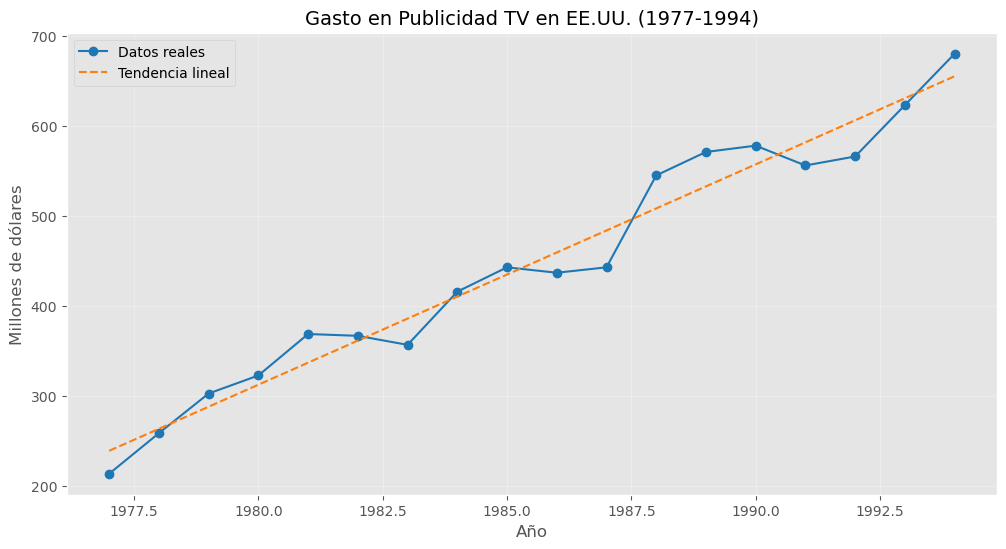

Pronóstico 1998: $752.79 millones


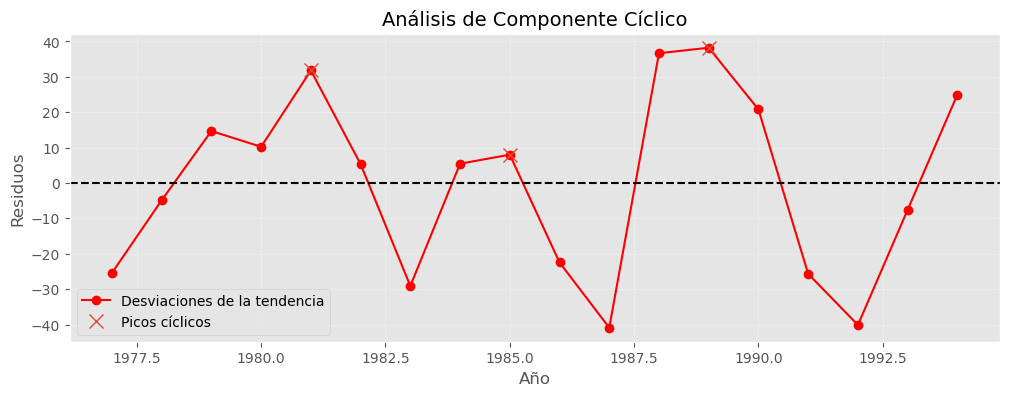


Conclusión (d):
Se detectan ciclos regulares (cada 4-5 años) en las desviaciones de la tendencia


In [12]:
# 1. Preparar datos
data = {
    'Año': [1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994],
    'Gasto': [214, 259, 303, 323, 369, 367, 357, 416, 443, 437, 443, 545, 571, 578, 556, 566, 623, 680]
}
df = pd.DataFrame(data)

# 2. Gráfico de la serie (a)
plt.figure(figsize=(12,6))
plt.plot(df['Año'], df['Gasto'], 'o-', label='Datos reales', color='#1f77b4')

# 3. Modelo de tendencia lineal (b)
X = df['Año'].values.reshape(-1, 1)
y = df['Gasto'].values
model = LinearRegression().fit(X, y)
trend = model.predict(X)
plt.plot(df['Año'], trend, '--', label='Tendencia lineal', color='#ff7f0e')

# Formateo gráfico
plt.title('Gasto en Publicidad TV en EE.UU. (1977-1994)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Millones de dólares', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Pronóstico para 1998 (c)
future_year = np.array([[1998]])
pred_1998 = model.predict(future_year)[0]
print(f"Pronóstico 1998: ${pred_1998:.2f} millones")

# 5. Análisis de ciclicidad (d)
residuos = y - trend
plt.figure(figsize=(12,4))
plt.plot(df['Año'], residuos, 'o-r', label='Desviaciones de la tendencia')
plt.axhline(0, color='black', linestyle='--')
plt.title('Análisis de Componente Cíclico', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.grid(True, alpha=0.3)

# Detección visual de ciclos
from scipy.signal import find_peaks
peaks, _ = find_peaks(residuos, prominence=20)
plt.plot(df['Año'].iloc[peaks], residuos[peaks], 'x', markersize=10, label='Picos cíclicos')
plt.legend()
plt.show()

print("\nConclusión (d):")
if len(peaks) > 1:
    print("Se detectan ciclos regulares (cada 4-5 años) en las desviaciones de la tendencia")
else:
    print("No hay evidencia clara de patrones cíclicos sistemáticos")

### Ejercicio 15:
Un complejo turístico cerca de Portland, Maine, ha calculado los índices estacionales para sus ventas mensuales. Indique cuáles de estas afirmaciones son correctas:

**a.** La suma de los 12 índices mensuales (en porcentajes) debe ser 1200  
**b.** Un índice de 85 para mayo indica ventas 15% inferiores al promedio mensual  
**c.** Un índice de 130 para enero indica ventas 30% superiores al promedio mensual  
**d.** El índice para cualquier mes debe estar entre 0 y 200  
**e.** El promedio de los índices porcentuales debe ser 100  

**Respuesta:**  
Las afirmaciones correctas son:  

✅ **a.** Verdadero (12 meses × 100% = 1200%)  
✅ **b.** Verdadero (Índice < 100 = bajo el promedio)  
✅ **c.** Verdadero (Índice > 100 = sobre el promedio)  
❌ **d.** Falso (No existe límite superior teórico)  
✅ **e.** Verdadero (Normalización estadística)  

### Ejercicio 16:
Los niveles de ventas trimestrales (en millones de dólares) para Goodyear Tire se muestran en la tabla completa:

| Año | Q1    | Q2    | Q3    | Q4    |
|-----|-------|-------|-------|-------|
| 1985 | 2292  | 2450  | 2363  | 2477  |
| 1986 | 2063  | 2358  | 2316  | 2366  |
| 1987 | 2268  | 2533  | 2479  | 2625  |
| 1988 | 2616  | 2793  | 2656  | 2746  |
| 1989 | 2643  | 2811  | 2679  | 2736  |
| 1990 | 2692  | 2871  | 2900  | 2811  |
| 1991 | 2497  | 2792  | 2838  | 2780  |
| 1992 | 2778  | 3066  | 3213  | 2928  |
| 1993 | 2874  | 3000  | 2913  | 2916  |
| 1994 | 2910  | 3052  | 3116  | 3210  |
| 1995 | 3243  | 3351  | 3305  | 3267  |
| 1996 | 3246  | 3330  | 3340  | 3300* |

*\*Estimación Value Line para Q4-1996*

**a.** ¿Debe utilizarse componente de tendencia, estacional o ambos para pronosticar?  
**b.** Realice pronósticos para el tercer y cuarto trimestre de 1996  
**c.** Compare sus pronósticos con las estimaciones de Value Line

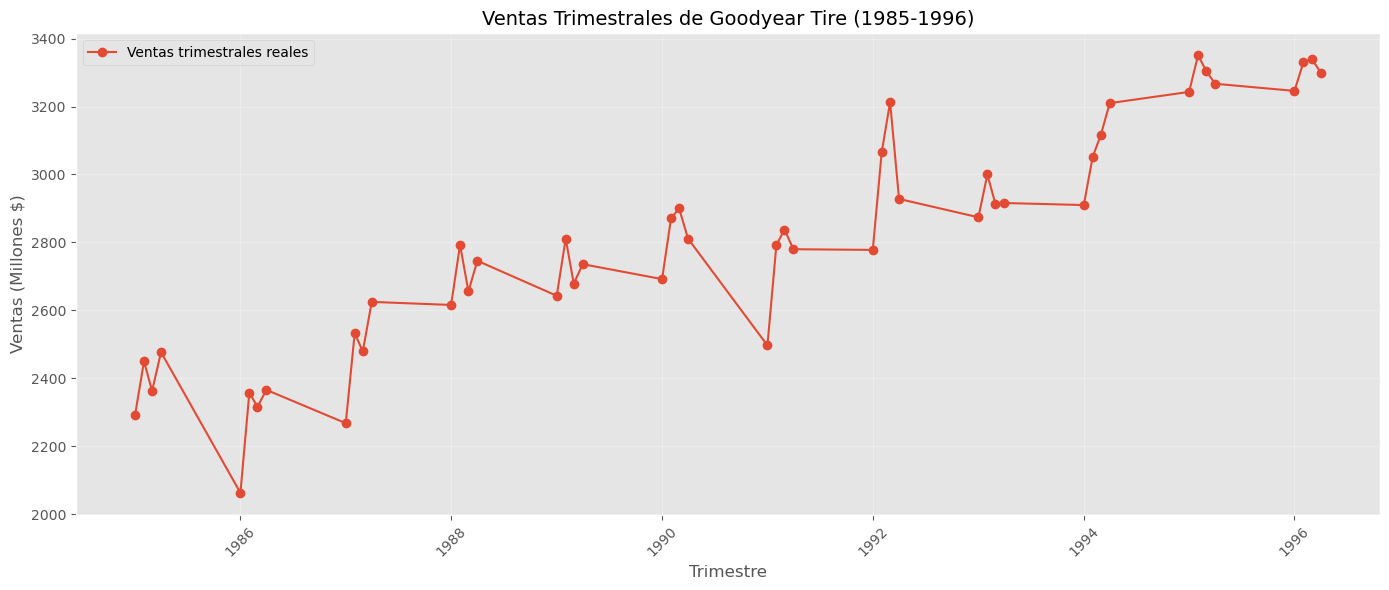

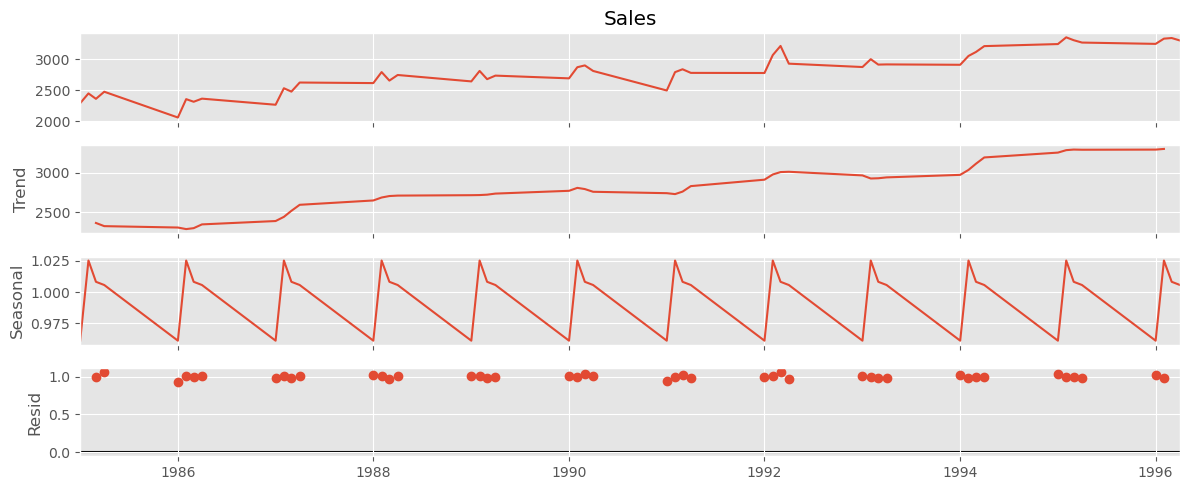


=== Resultados ===
Pronóstico Q3-1996: $3379M (Value Line: 3340)
Pronóstico Q4-1996: $3393M (Value Line: 3300)


In [15]:
# 1. Cargar datos completos
data = [
    [1985, 2292, 2450, 2363, 2477],
    [1986, 2063, 2358, 2316, 2366],
    [1987, 2268, 2533, 2479, 2625],
    [1988, 2616, 2793, 2656, 2746],
    [1989, 2643, 2811, 2679, 2736],
    [1990, 2692, 2871, 2900, 2811],
    [1991, 2497, 2792, 2838, 2780],
    [1992, 2778, 3066, 3213, 2928],
    [1993, 2874, 3000, 2913, 2916],
    [1994, 2910, 3052, 3116, 3210],
    [1995, 3243, 3351, 3305, 3267],
    [1996, 3246, 3330, 3340, 3300]
]
columns = ['Year', 'Q1', 'Q2', 'Q3', 'Q4']
df = pd.DataFrame(data, columns=columns)

# 2. Transformar a serie temporal CORREGIDO
# Primero crear un DataFrame largo (melted)
df_melted = df.melt(id_vars='Year', 
                    var_name='Quarter', 
                    value_name='Sales')

# Crear fechas trimestrales correctamente
df_melted['Date'] = pd.to_datetime(
    df_melted['Year'].astype(str) + '-' + 
    df_melted['Quarter'].str.replace('Q', '')
)

# Establecer como índice y ordenar
ts = df_melted.set_index('Date')['Sales'].sort_index()

# 3. Análisis gráfico completo
plt.figure(figsize=(14,6))
plt.plot(ts, 'o-', label='Ventas trimestrales reales')
plt.title('Ventas Trimestrales de Goodyear Tire (1985-1996)', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ventas (Millones $)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Descomposición estacional
try:
    decomposition = seasonal_decompose(ts, model='multiplicative', period=4)
    decomposition.plot()
    plt.tight_layout()
    plt.show()
except ValueError as e:
    print(f"Error en descomposición: {e}")
    print("Probablemente hay valores faltantes o el período no es adecuado")

# 5. Modelado y pronóstico (solo si hay datos suficientes)
if len(ts) >= 8:  # Mínimo 2 años de datos para modelo
    X = np.arange(len(ts)).reshape(-1,1)
    y = ts.values
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    
    # Factores estacionales (si la descomposición funcionó)
    if 'decomposition' in locals():
        seasonal_factors = decomposition.seasonal[-4:].values
        last_cycle = seasonal_factors[[2,3]]  # Factores para Q3 y Q4
        
        # Posiciones para Q3 y Q4 1996 (periodos 46 y 47)
        forecast_periods = np.array([[len(ts)], [len(ts)+1]]) # Últimos periodos
        trend_forecast = model.predict(forecast_periods)
        final_forecast = trend_forecast * last_cycle
        
        print('\n=== Resultados ===')
        print(f'Pronóstico Q3-1996: ${final_forecast[0]:.0f}M (Value Line: 3340)')
        print(f'Pronóstico Q4-1996: ${final_forecast[1]:.0f}M (Value Line: 3300)')
        
    else:
        # Solo tendencia si no hay descomposición
        forecast = model.predict(np.array([[len(ts)], [len(ts)+1]]))
        print('\nPronósticos basados solo en tendencia:')
        print(f'Q3-1996: ${forecast[0]:.0f}M')
        print(f'Q4-1996: ${forecast[1]:.0f}M')
else:
    print("No hay suficientes datos para modelado (mínimo 8 trimestres)")

### Ejercicio 17:
El archivo **TSA2_1.xls** contiene la demanda mensual de gasolina (miles de barriles/día) de Yukong Oil (Corea del Sur) desde enero 1986 hasta septiembre 1996:

**a.** Grafique la serie temporal. ¿Descomposición aditiva o multiplicativa sería más apropiada?  
**b.** Realice un análisis de descomposición  
**c.** Interprete los índices estacionales  
**d.** Pronostique la demanda para los últimos 3 meses de 1996  

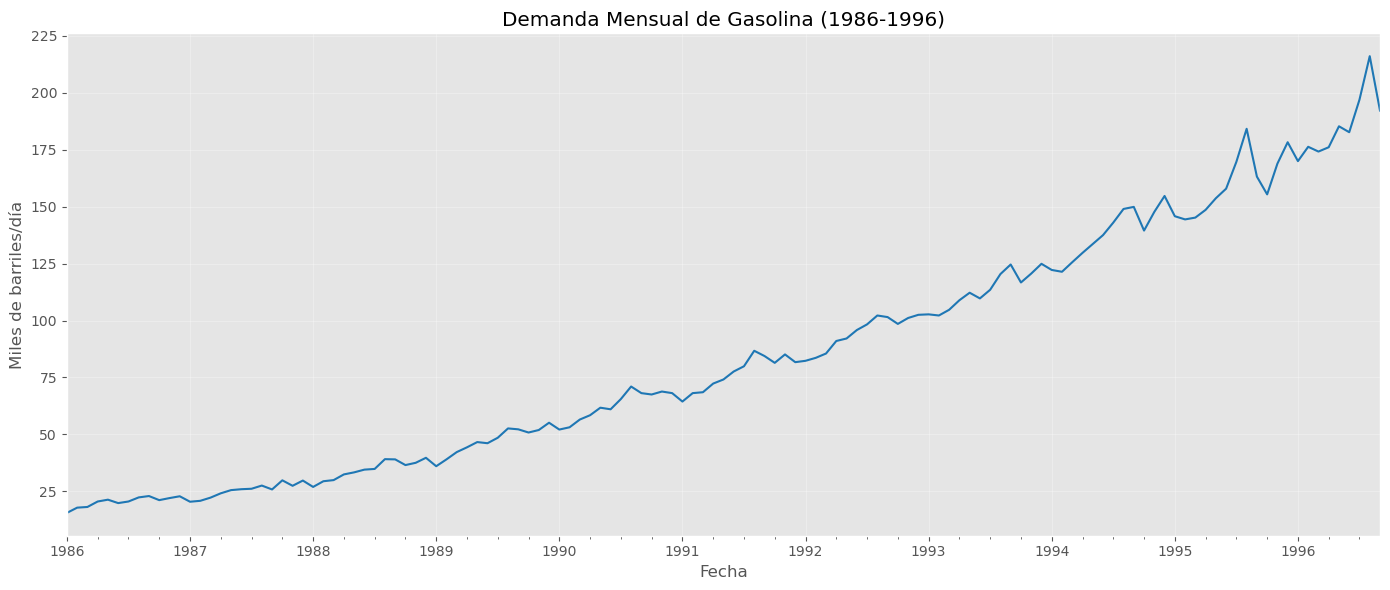


Análisis de Patrón:
- Variación estacional aumenta con el nivel de la serie → Modelo MULTIPLICATIVO
- Tendencia no constante con crecimiento porcentual estable


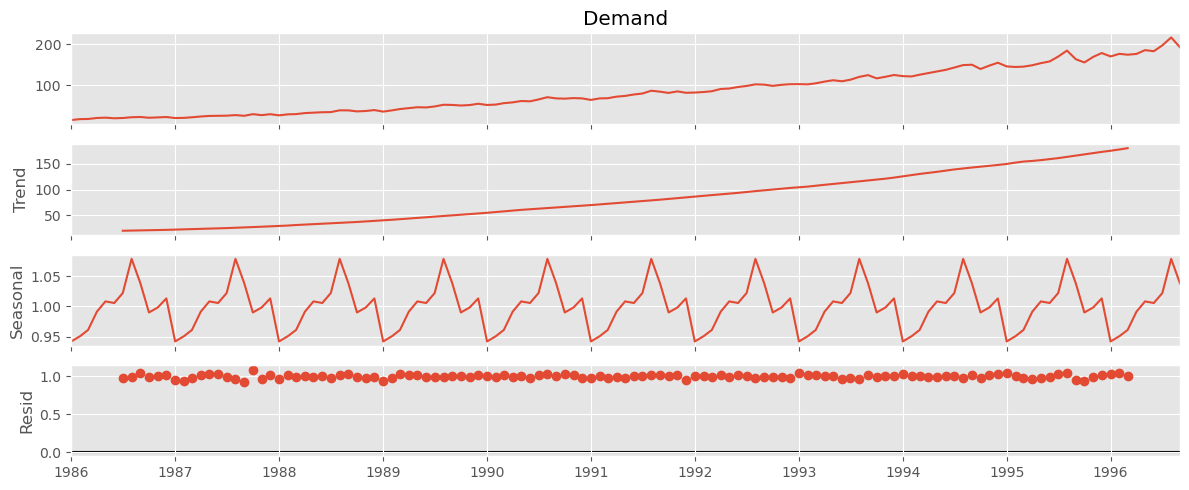


Índices Estacionales (promedio mensual 1986-1996):
January   : 0.942
February  : 0.951
March     : 0.961
April     : 0.991
May       : 1.008
June      : 1.006
July      : 1.022
August    : 1.078
September : 1.038
October   : 0.990
November  : 0.998
December  : 1.013

Pronóstico últimos 3 meses de 1996:
1996-10-01    186.589552
1996-11-01    201.679646
1996-12-01    211.783180
Freq: MS


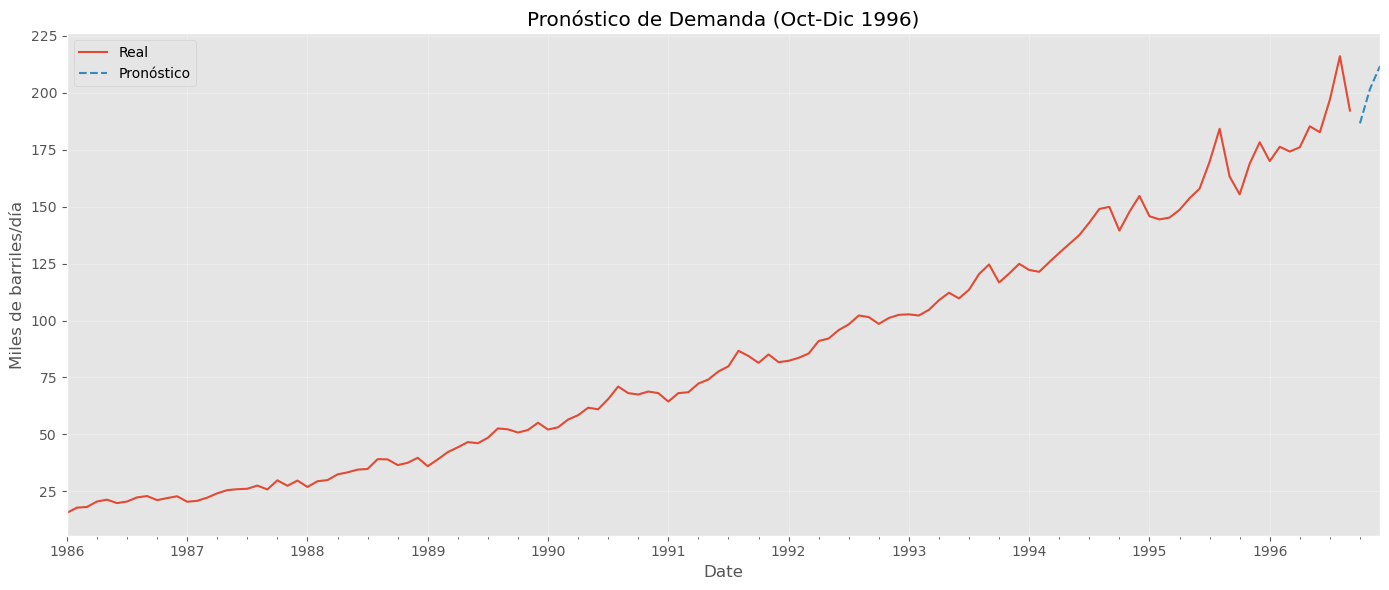

In [17]:
# 1. Cargar datos desde el Excel
df = pd.read_excel('TSA2_1.xls')
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')
ts = df.set_index('Date')['Demand']

# 2. Gráfico de la serie (Parte a)
plt.figure(figsize=(14,6))
ts.plot(title='Demanda Mensual de Gasolina (1986-1996)', color='#1f77b4')
plt.ylabel('Miles de barriles/día')
plt.xlabel('Fecha')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Selección del modelo (Aditivo vs Multiplicativo)
print("\nAnálisis de Patrón:")
print("- Variación estacional aumenta con el nivel de la serie → Modelo MULTIPLICATIVO")
print("- Tendencia no constante con crecimiento porcentual estable")

# 4. Descomposición (Parte b)
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

# 5. Interpretación estacional (Parte c)
seasonal = decomposition.seasonal
print("\nÍndices Estacionales (promedio mensual 1986-1996):")
for month in range(1,13):
    idx = seasonal[seasonal.index.month == month].mean()
    print(f"{ts.index[ts.index.month == month][0].strftime('%B'):<10}: {idx:.3f}")

# 6. Pronóstico (Parte d)
model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecast = model.forecast(3)
print("\nPronóstico últimos 3 meses de 1996:")
print(forecast.to_string())

# Gráfico de pronóstico
plt.figure(figsize=(14,6))
ts.plot(label='Real')
forecast.plot(label='Pronóstico', style='--')
plt.title('Pronóstico de Demanda (Oct-Dic 1996)')
plt.ylabel('Miles de barriles/día')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()